# Capital Bikeshare Ride Prediction: Data Wrangling

**Author**: Matthew Cassi
<br>
**Date**: September 25, 2017

## I. Project Description
The Capital Bikeshare Prediction project will involve predicting how long a ride will take between two Bikeshare locations in Washington D.C.. This analysis will take into account the day of the week, weather, and whether the ride falls on a holiday or not. 
## II. Datasets
The data for the prediction comes from two different sources: UCI Machine Learning Repository for the weather data and the Capital Bikeshare website for the time and start/end point data. The data will need to be joined together to perform the analysis needed for prediction. The UCI dataset contains dates and weather information (wind, temperature, humidity, number of bikes per day) for each day between January 2011 and December 2012. The bikeshare dataset contains start times, end time, start locations, end locations, and member type from the first quarter of 2011 through the first quarter of 2012.
<br>
<br>
The UCI data can be found here: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
<br>
The Bikeshare data can be found here: https://s3.amazonaws.com/capitalbikeshare-data/index.html
## III. Loading and Cleaning the Datasets
All five datasets contain date columns that needed to be loaded in as datetime objects to make it easier for filtering and merging of the datasets. To handle the date coolumns, the parse_dates attributes were used on in the read_csv functions. This created all date columns as datetime objects in Python.
<br>
<br>
When inspecting the first few rows of each dataframe, each datasets have columns that are not necessary for the analysis and prediction aspects of the project. The UCI weather dataset contains extra columns like month, year, and instant (an index column). The bikeshare dataset contains additional columns like duration (text field) and bike serial number. All of these columns were removed as they would not impact the analysis to be performed. In addition to removing columns, some columns had to be renamed so all columns match, which is needed for the the joining of the datasets.
<br>
<br>
There were not many missing values in each dataset. The bikeshare data contained 11 rows that did not have a final end point. These rows were removed from the bikeshare dataset. The UCI data did not have any null or missing values. 
<br>
<br>
Prior to joining the datasets together, the date columns from all datasets needed to be in the same format. The UCI weather dataset date format is YYYY-MM-DD, while the Bikeshare datasets used a YYYY-MM-DD HH:MM:SS format. Two additional columns were created in the Bikeshare datasets with the YYYY-MM-DD format. The original columns with the hours, minutes, and seconds were kept. In addition to creating those two columns, another columns was created for the time difference, in minutes, based on parsing the duration column (string like '0h 12min. 33sec.'). After calculating the ride time, there were values of 0, which accounted for 42 rows. These rows were removed.
## IV. Joining and Concatenating the Datasets
Each dataset needed to be joined to have a complete dataset needed for prediction purposes. The datasets were left joined with each bikeshare dataset as the left dataset and the UCI data as the right dataset. This was done so that all of the values from the bikeshare dataset remained in the dataset and only the dates that matched from the UCI dataset were included.
<br>
<br>
Once the datasets were all joined together, they needed to be concatenated so all the quarterly data would be combined.
## V. Outliers
After cleaning and joining the datasets together, the data was inspected for outliers. The main column to check was the duration column of the data. The duration column contained many values that were very large with the max being well over 5000 minutes. 

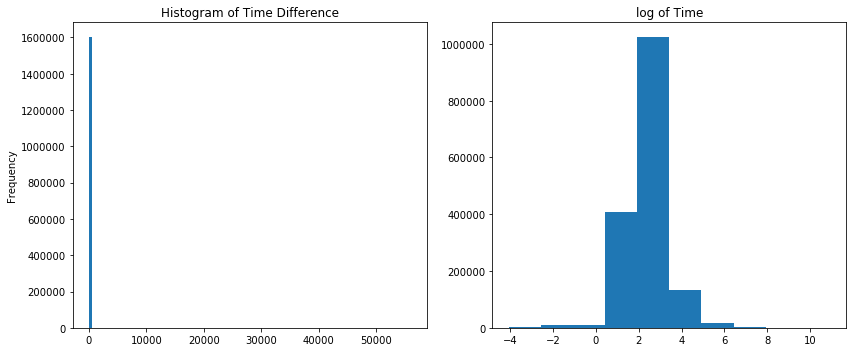

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

bikeshare = pd.read_csv('bikeshare_full.csv', parse_dates=['Start date', 'End date'])

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
bikeshare['time_diff'].plot.hist(bins=100)
plt.title('Histogram of Time Difference')
plt.subplot(1,2,2)
plt.hist(np.log(bikeshare['time_diff']))
plt.title('log of Time')
plt.tight_layout()
plt.show()

The histograms above show the actual data and the log of the ride time. On the left, you can see that the actual data is heavily skewed to the right. There seem to be outliers that are causing problems with seeing the full distribution of the ride time variable. On the right, the natural log transform was used and you can see that the data is almost normal. The skew was removed and the center of the data is around 2.5, which is roughly 13 minutes.
<br>
<br>
An arbitrary value of 80 minutes and greater than 30 seconds were selected for the cutoffs of outliers. While 80 minutes (also, anything greater than 32 minutes) falls out of the Interquartile Range, I felt that was a good value for the a bike ride in the Washington D.C. area based on traffic, weather, and distance between some of the stations. This accounted for about 52 thousand rows. We are left with 1,538,000 rows.

In [9]:
bikeshare_smaller = pd.read_csv('bikeshare_reduced.csv', parse_dates=['Start date', 'End date'])

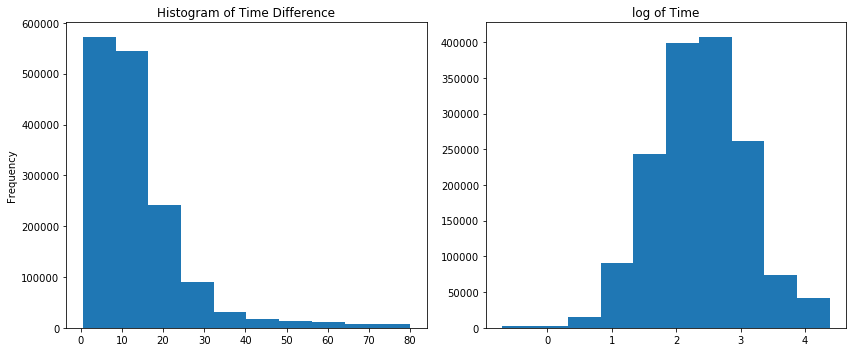

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
bikeshare_smaller['time_diff'].plot.hist()
plt.title('Histogram of Time Difference')
plt.subplot(1,2,2)
plt.hist(np.log(bikeshare_smaller['time_diff']))
plt.title('log of Time')
plt.tight_layout()
plt.show()

After removing the outliers of this dataset, the box of the box plot became visible and the distribution of the time difference looked like it was right skewed. The log transform was done again on the right and the distribution looks a little more normal than before. The center of the data is still near 2.5, which is roughly 13 minutes.